# PCA Analysis


In this project we are working on an up-to-date COVID19 dataset. The dataset reports the number of total cases for different countries at the end of each day.

Data url: https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv


In [1]:
import pandas as pd
rawdf = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv',
    index_col=0,
    thousands=','
)

# Part 1: Geting started 

In [2]:
%matplotlib inline

In [3]:
# select data of 20 countries to reduce the datasize
countries = ['US', 'China','Canada', 'Italy', 'Japan', 'India', 'Korea, South', 'Spain', 'United Kingdom', 'France',
             'Germany', 'Sweden', 'Switzerland', 'Russia', 'Brazil', 'Mexico', 'Australia', 'New Zealand', 'Turkey', 'Iran']
df = rawdf.loc[countries, :]
df

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,10-May,11-May,12-May,13-May,14-May,15-May,16-May,17-May,18-May,19-May,20-May,21-May,22-May,23-May,24-May,25-May,26-May,27-May,28-May,29-May,30-May,31-May,01-Jun,02-Jun,03-Jun,04-Jun,05-Jun,06-Jun,07-Jun,08-Jun,09-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1334084,1352962,1374914,1396109,1423726,1449026,1474127,1493131,1514839,1535337,1558949,1584486,1608623,1630450,1651239,1670209,1689057,1707423,1730259,1754747,1778993,1799122,1816476,1837367,1857248,1878543,1903854,1926538,1944309,1961781,1979868,2000702,2023590,2048986,2074526,2094058,2114026,2137731,2163290,2191052
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,84010,84011,84018,84024,84029,84038,84044,84054,84063,84063,84063,84063,84081,84084,84095,84102,84103,84106,84106,84123,84128,84146,84154,84161,84160,84171,84177,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378,84422,84458,84494
Canada,0,0,0,0,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,14,20,24,...,70091,71264,72419,73568,74781,75959,77206,78332,79411,80493,81575,82742,83947,85151,86106,87119,88090,88989,89976,90909,91681,92479,93288,93960,94641,95269,95947,96475,97178,97779,98241,98720,99159,99595,100043,100404,100763,101087,101491,101877
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,...,219070,219814,221216,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658,229327,229858,230158,230555,231139,231732,232248,232664,232997,233197,233515,233836,234013,234531,234801,234998,235278,235561,235763,236142,236305,236651,236989,237290,237500,237828,238159
Japan,2,2,2,2,4,4,7,7,11,15,20,20,20,22,22,22,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367,16367,16424,16513,16536,16550,16581,16623,16651,16598,16673,16716,16751,16787,16837,16867,16911,16958,17000,17039,17060,17111,17146,17187,17250,17293,17369,17439,17484,17530,17588
India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,67161,70768,74292,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532
"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,...,10909,10936,10962,10991,11018,11037,11050,11065,11078,11110,11122,11142,11165,11190,11206,11225,11265,11344,11402,11441,11468,11503,11541,11590,11629,11668,11719,11776,11814,11852,11902,11947,12003,12051,12085,12121,12155,12198,12257,12306
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,224350,227436,228030,228691,229540,230183,230698,230698,231606,232037,232555,233037,234824,235290,235772,235400,236259,236259,237906,238564,239228,239479,239638,239932,240326,240660,240978,241310,241550,241717,241966,242280,242707,243209,243605,243928,244109,244328,244683,245268
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,...,220449,224332,227741,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544,258504

Visualize the number of cases in each country

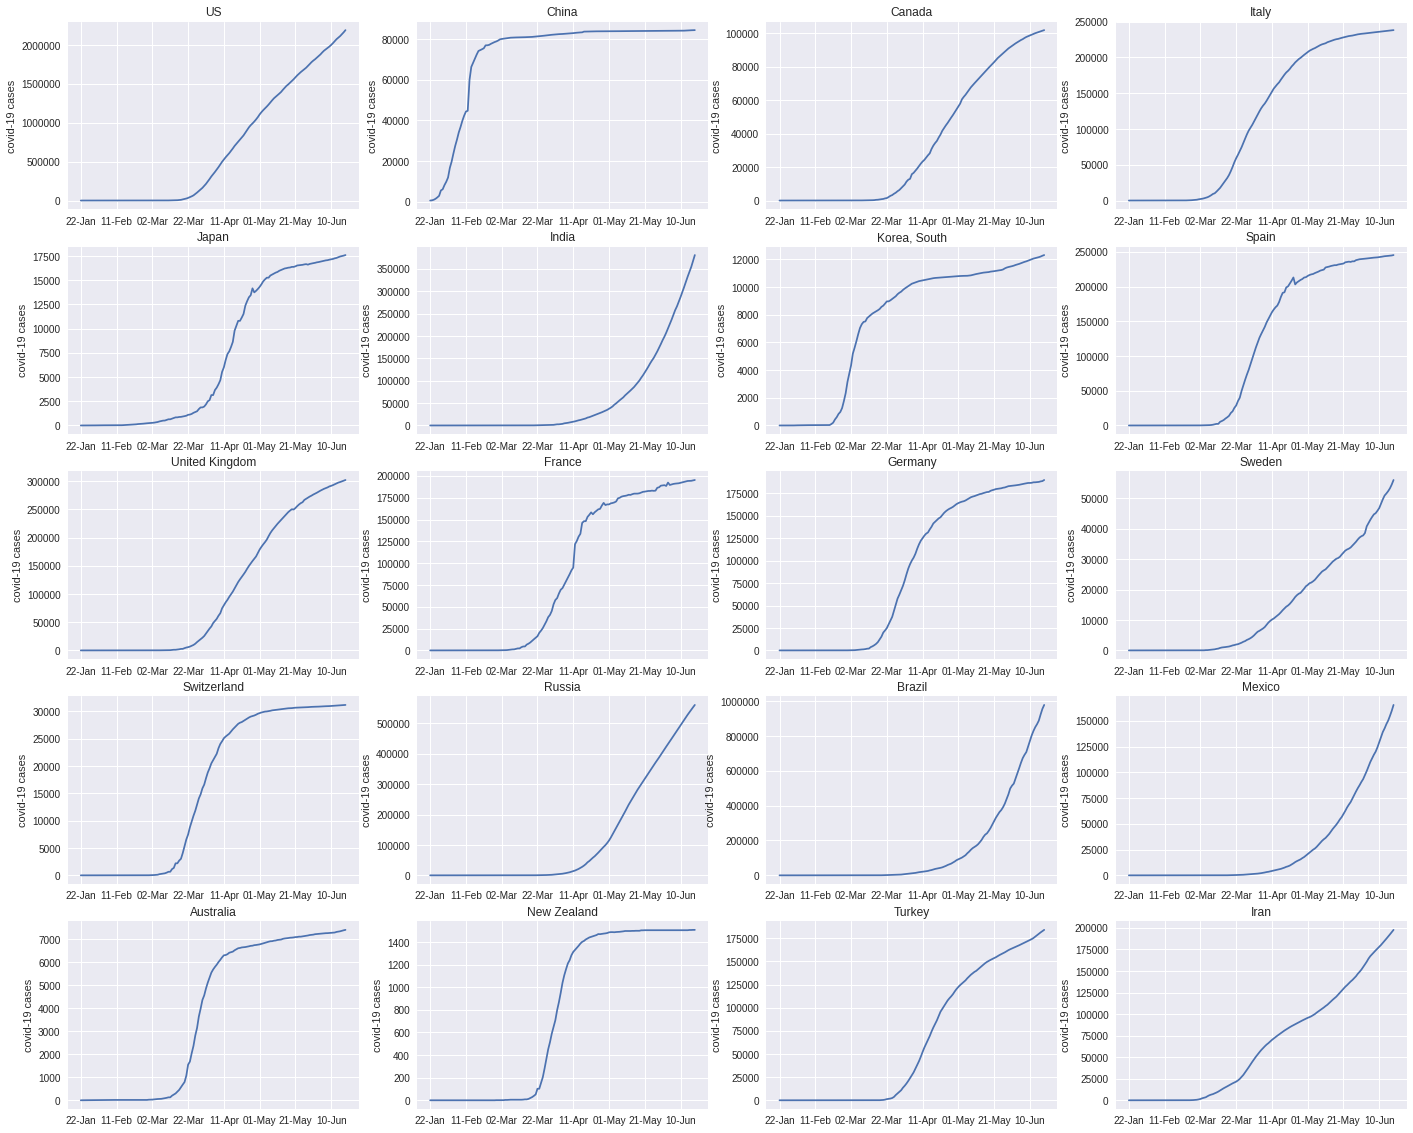

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

def plot_data(df, index):
  plt.style.use('seaborn')

  #configure axes for subplots
  nplots=len(index)
  plt.figure(figsize=(24,20))
  gs = gridspec.GridSpec(nplots//4,4)

  # plot graphs for each country
  for i in range(nplots):
    ax = plt.subplot(gs[i])
    ax.ticklabel_format(useOffset=False, style='plain') #turn off scientific notation
    ax.plot(df.loc[index[i]]) 
    ax.xaxis.set_major_locator(plt.MaxNLocator(10)) #display less ticks on x-axis
    # ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.set_title(index[i])
    ax.set_ylabel('covid-19 cases')
  
plot_data(df, countries)

In [5]:
# # plot data on same graph 
# def plotOnSameGraph(df, index): 
#   import matplotlib.ticker as ticker
#   nplots=len(index)
#   plt.figure(figsize=(16,8))
#   ax = plt.axes()
#   for i in range(20):
#     plt.plot(df.loc[index[i]], label=index[i]) 
#   ax.xaxis.set_major_locator(ticker.AutoLocator())
#   ax.set_title(index[i])
#   ax.legend(loc='best')
#   ax.set_ylabel('covid-19 cases')
# plotOnSameGraph(df, countries)

mean 1.4157206354280523e-18
std 1.0259783520851535


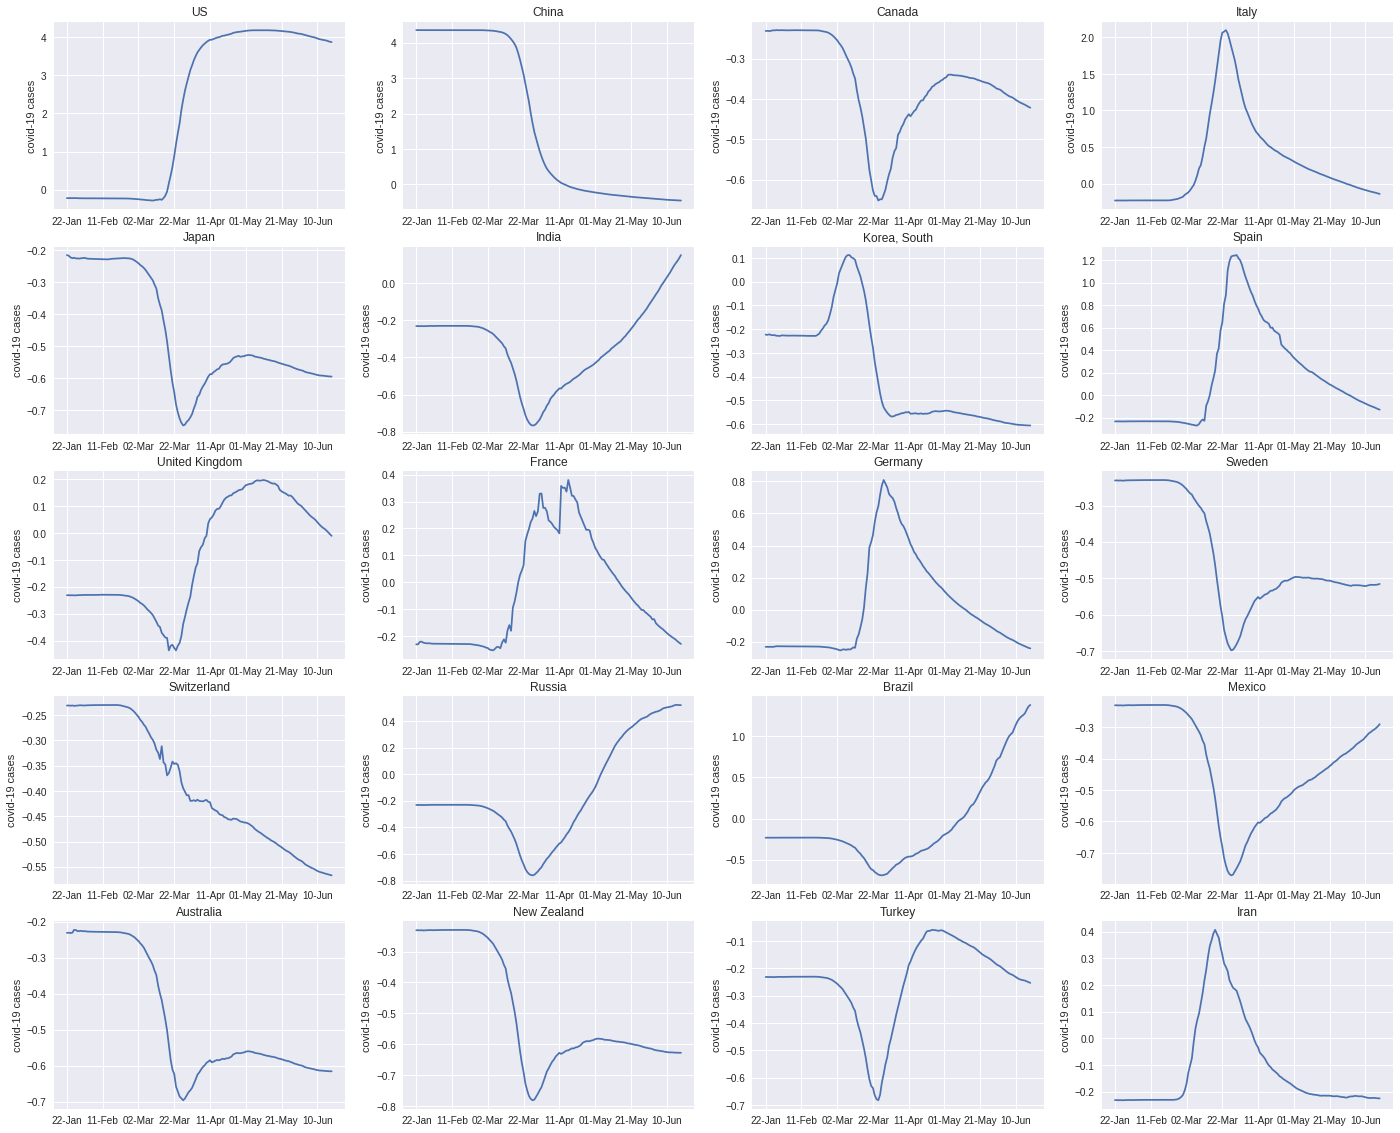

In [6]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, index=countries, columns=df.columns)

print('mean', df_std.mean(axis=0).mean())
print('std', df_std.std().mean())
#plot graphs
plot_data(pd.DataFrame(df_std), countries)

#### *What is the trend of standardized time-series for the US, Canada, and China. Why does the curve goes up or down? What do negative and positive values mean?*

* The trend represents number of cases in one country relative to other countries. It reflects the severity of the pandemic in that country compared to rest of the world.  
* For China, the trend starts high at value of 4, meaning the pandemic is most severe  at beginning as most cases were reported from China at that time. After March, the situation was controlled. The number of cases dropped down, as reflected by the decresed trend.
* The situaiton is the opposite in US, where the trend started low and spiked up after March. Few cases were reported before March, and situation worsened afterwards with large increase in number of cases. 
* For Canada, the standardized value is below zero, meaning its number of cases is below average compared to other countries. The trend dripped down forming a concave shape. The virus spread was slower compared to some other countries when it was at the bottom of the concave, then the virus spread caught to the global trend so the trend went up.

#### Is there any other trend pattern?
* A sudden pike in the trend indicates an outbreak. (eg. Italy, Iran, Germany)

* Oscillation means the situation fluctuates, it's observed in part of Switzerland and France.
* Monitonic increase is only observed in US.
* Monitonic decrease is only observed in China.


# Part 2: Applying PCA 

In [7]:
# compute covariance matrix
cov = np.cov(df_std.T)
print(cov.shape)
# compute eigenvalues and eignevectors
eigenValues, eigenVectors = np.linalg.eigh(cov)

(149, 149)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


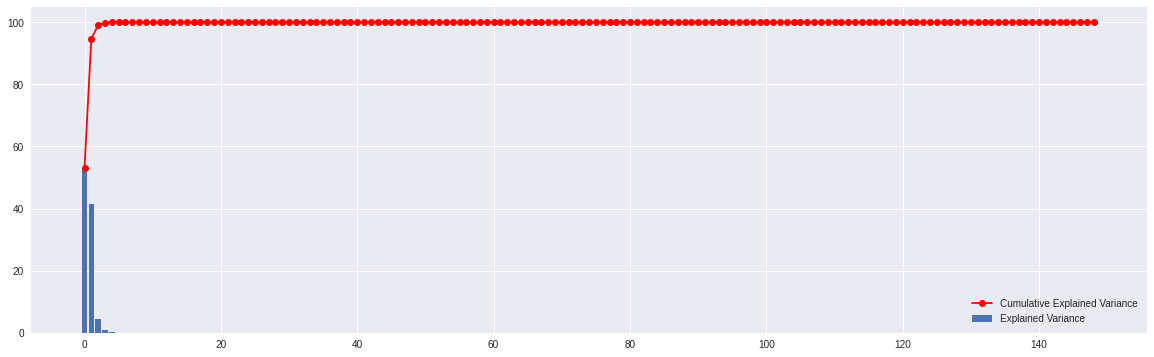

In [8]:
# sort eigenvalues in descresing order
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

# explained variance 
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

# plot scree plot
plt.figure(figsize=(20,6))
plt.bar(range(df_std.shape[1]), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
ax = plt.axes()
plt.legend()

# First 3 principal components can cover 99% of dataset's variance 

First 3 principal components can cover 99% of dataset's variance 

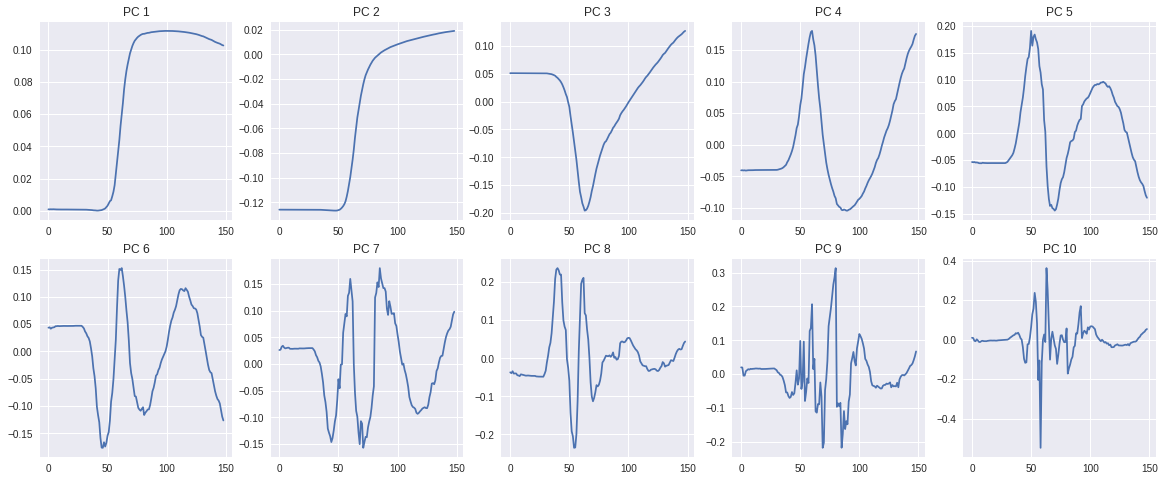

In [9]:
# Show the first 10 principal components (Eigenvectors) plotted as a time series.

COUNT = 10
W = eigenVectors[:, 0:COUNT]

plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2,int(COUNT/2))
for i in range(COUNT):
  ax = plt.subplot(gs[i])
  ax.plot(W[:,i])
  ax.set_title('PC %d' % (i+1))


#### What might any of the principal components represent?


* The principal components represents strong patterns in the dataset. Similar shapes can be found in the orginal standardized data, epecially the first three components as they represents 99% of data. 
* The first and second component represents the sudden spike in covid-19 cases in April. 
* The third component represents the dip obseved in many countries such as Canada, Mexico and Turkey. The pandemic in these countries happened later than other countries, forming the downward part of the dip as their cases were still low when other countries started to have spike in number of cases. The upward part of the drip occured when the virus was spread to these countries, then the  contagion happended and number of cases went up. 

# Part 3: Data reconstruction

Implement a function that:


*   Accepts a country name as an input
*   Plots the standardized time-series for it. 
*   Shows the incremental reconstruction for the first 10 principal components (10 plots each showing the standard time-series and your reconstruction). 
*   For each incremental reconstruction step, plots the residual error of reconstruction compared to the original sample (standardized time-series) and a title that states the RMSE of the reconstruction.
* Computes how many PCs are needed so that RMSE would be less than 1\% of data reconstruction with only the first principal component. (e.g., if the RMSE for the first principal component is 4000, we want to know how many PC we need so that RMSE would be less than 40.)


Test the function with `US`, `Canada`, and `China`.



In [10]:
def plotReconstruction(countryName):
  
  # number of PC to plot
  numPC = 10

  # flag to determine mininum PC
  minPC = df_std.shape[1]
  hasMinPC = False

  #subplots
  fig = plt.figure(constrained_layout=True, figsize=(25,6))
  fig.suptitle(countryName)
  gs = fig.add_gridspec(3, numPC)

  # original graph
  f_orig = fig.add_subplot(gs[0, 0])
  f_orig.set_title('Original')
  orig = df_std.loc[countryName].tolist()
  f_orig.plot(orig)

  for i in range(numPC):  
    # reconstruction
    f_recon = fig.add_subplot(gs[1, i])
    f_recon.set_title('Reconstruct {}'.format(i+1))
    W = eigenVectors[:, 0:i]
    projX = np.dot(df_std.loc[countryName], W)
    recon = np.dot(projX, W.T)
    f_recon.plot(recon)

    # residual error
    f_rmse = fig.add_subplot(gs[2, i])
    rmse = np.sqrt(((recon - orig) ** 2).mean())
    f_rmse.set_title('RMSE {:.4f}'.format(rmse))
    f_rmse.plot(orig-recon)

    # RMSE of first princile compoent
    if i == 0:
      firstRMSE = rmse
      targetRMSE = firstRMSE * 0.01
    # determine how many PC required
    else:
      if rmse < targetRMSE and not hasMinPC:
        minPC = i+1
        hasMinPC = True

  print('First PC has RMSE of {:.4f}'.format(firstRMSE))
  print("1% of first PC's RMSE is {:.4f}".format(targetRMSE))
  print("{} PC required to reach 1% of first component's RMSE \n".format(minPC))

First PC has RMSE of 2.9971
1% of first PC's RMSE is 0.0300
5 PC required to reach 1% of first component's RMSE 



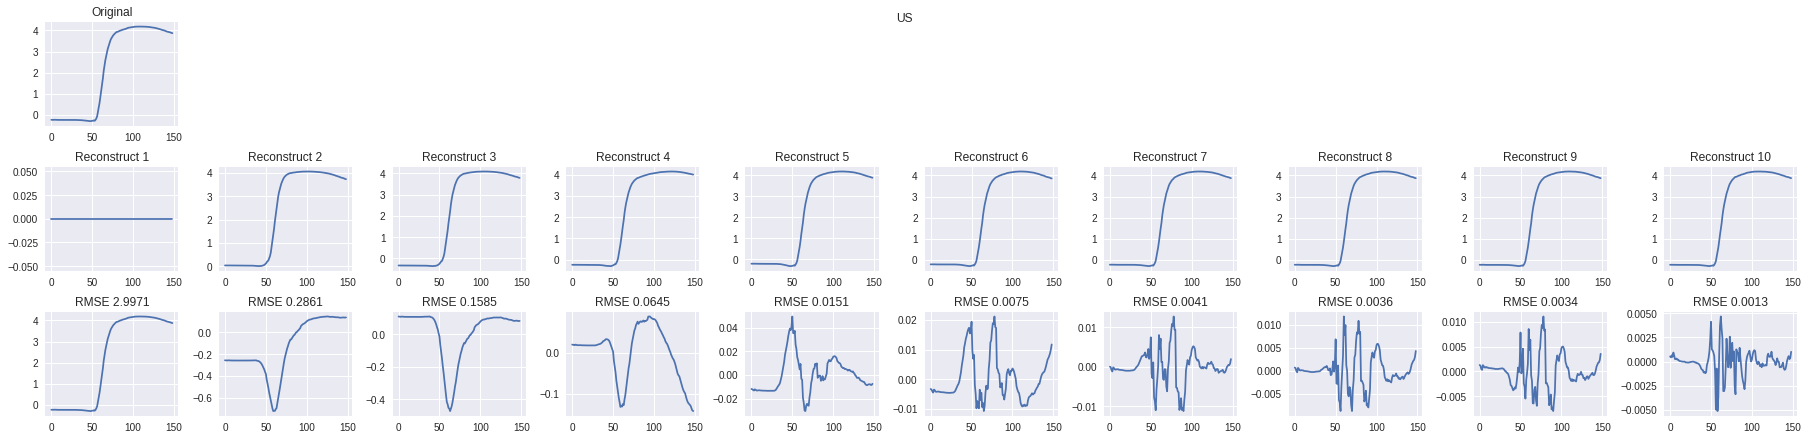

In [11]:
plotReconstruction('US')

First PC has RMSE of 0.3804
1% of first PC's RMSE is 0.0038
10 PC required to reach 1% of first component's RMSE 



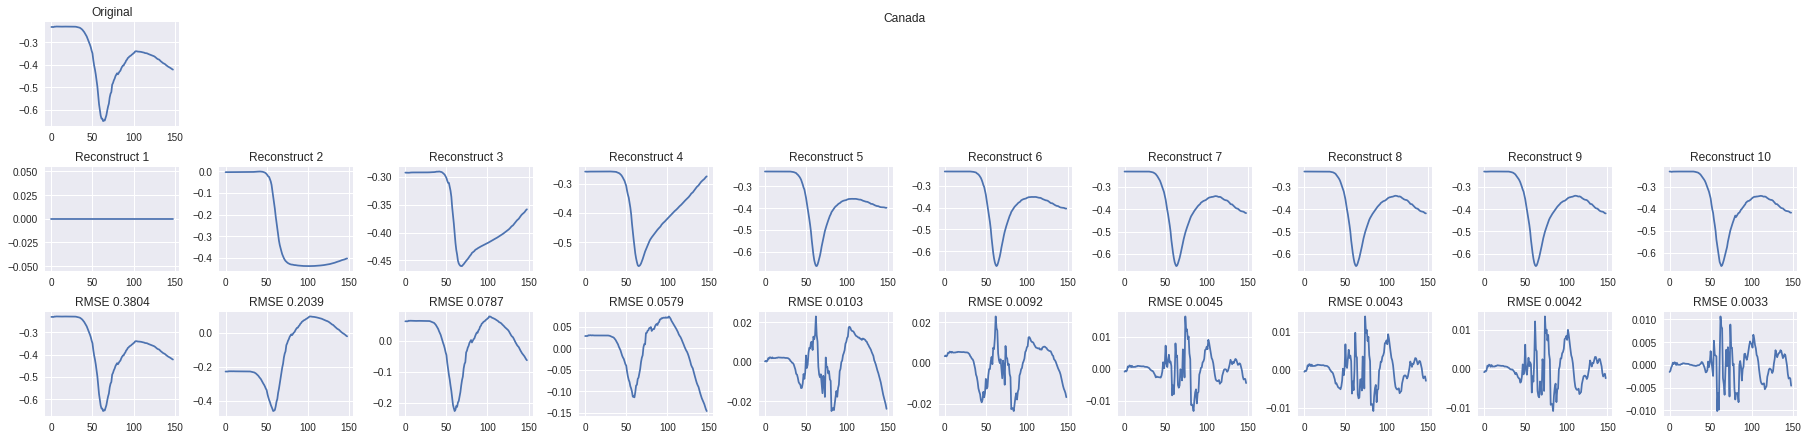

In [12]:
plotReconstruction('Canada')

First PC has RMSE of 2.7816
1% of first PC's RMSE is 0.0278
4 PC required to reach 1% of first component's RMSE 



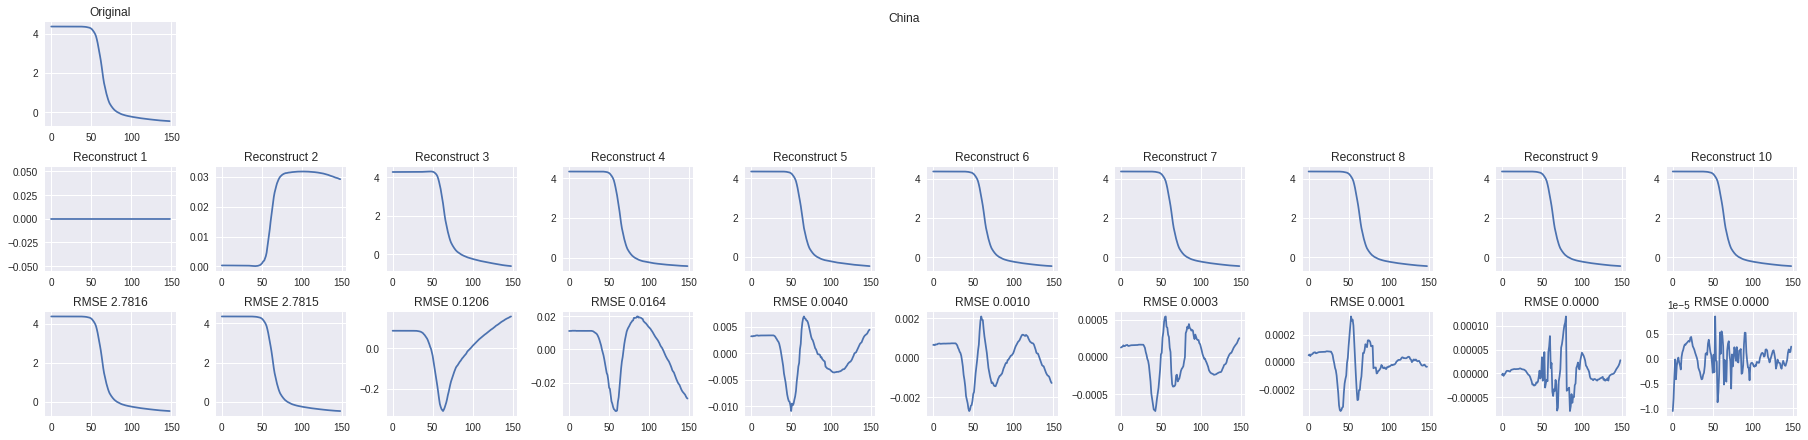

In [13]:
plotReconstruction('China')

The number of components required to have RMSE less than 1% varies for each country. But typically most information can be reconstructed with first 10 components. RSME after that becomes noise-like. It proves how PCA can reduce the data dimension while preserving necessary information.


# Part 4: Predicting the future!
Estimate the number of new cases in the near future (like a week) using only PCA.


*   We already saw that the first few PCs are the most useful ones and their trend is not that random! We can predict the eigenvector values for the near future and reconstruct the data based on them. 


* Predict the total cases for `Canada`, `Brazil`, and `Russia` by June 25th. 

* Verify with `https://www.worldometers.info/coronavirus/` and see how much the estimations are close to reality. 





(149, 149)


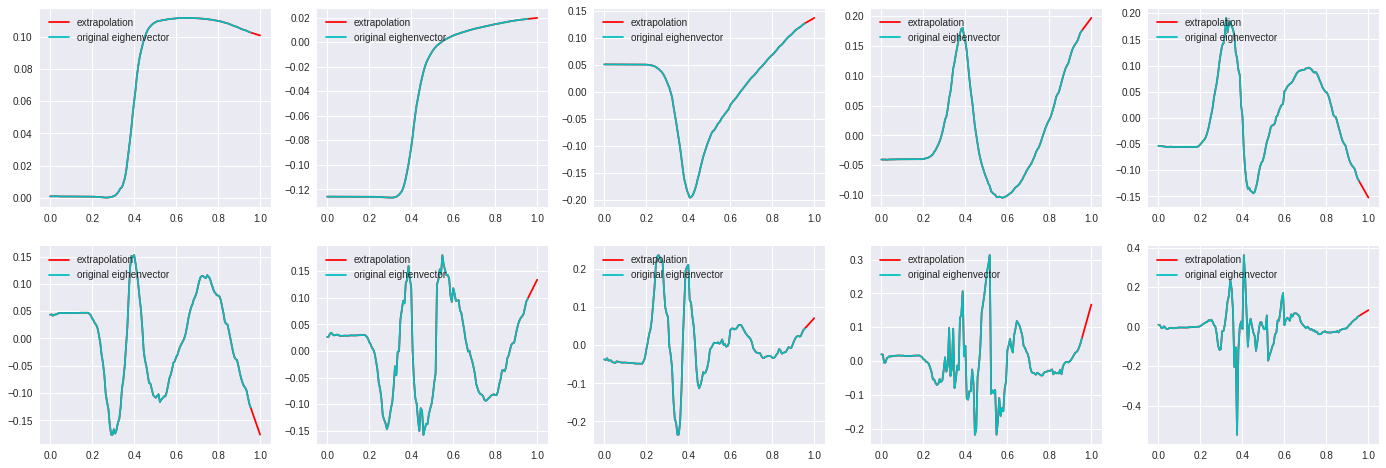

In [14]:
# compute covariance matrix
cov = np.cov(df_std.T)
print(cov.shape)
# compute eigenvalues and eignevectors
eigenValues, eigenVectors = np.linalg.eigh(cov)
# sort eigenvalues in descresing order
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

# use first 10 components
COUNT = 10
W = eigenVectors[:, 0:COUNT]

# assume the shape of the eighenvector does not fluctuate for the near future
# use extrapolation to predict next 7 days' eighenvalues
from scipy.interpolate import InterpolatedUnivariateSpline

daysKnown = W.shape[0]
days = np.linspace(0, 1, daysKnown + 7)
gs = gridspec.GridSpec(COUNT//5,5)

plt.figure(figsize=(24,8))
for i in range(COUNT):
    # extrapolate linearly 
    s = InterpolatedUnivariateSpline(days[:daysKnown], W[:,i], k=1) 
    eig = s(days).reshape(-1,1)
    if i == 0: 
      predEig = np.array(eig)
    else:
      predEig= np.hstack([predEig, eig])

    ax = plt.subplot(gs[i])
    ax.plot(days, eig, 'r', label='extrapolation')
    ax.plot(days[:daysKnown], W[:,i], 'c', label='original eighenvector')
    ax.legend(loc='upper left')

In [15]:
# extrapolate mean and standard deviation as well
# they should also increase with time as more cases are diagnosed
mu, si = df.mean(), df.std()
s = InterpolatedUnivariateSpline(days[:daysKnown], mu, k=1) 
muPred = s(days)
s = InterpolatedUnivariateSpline(days[:daysKnown], si, k=1) 
siPred = s(days)

In [16]:
# reconstruction
projX = np.dot(df_std, eigenVectors[:,0:COUNT])
recon = np.dot(projX, predEig.T)
predDf = recon*siPred+muPred

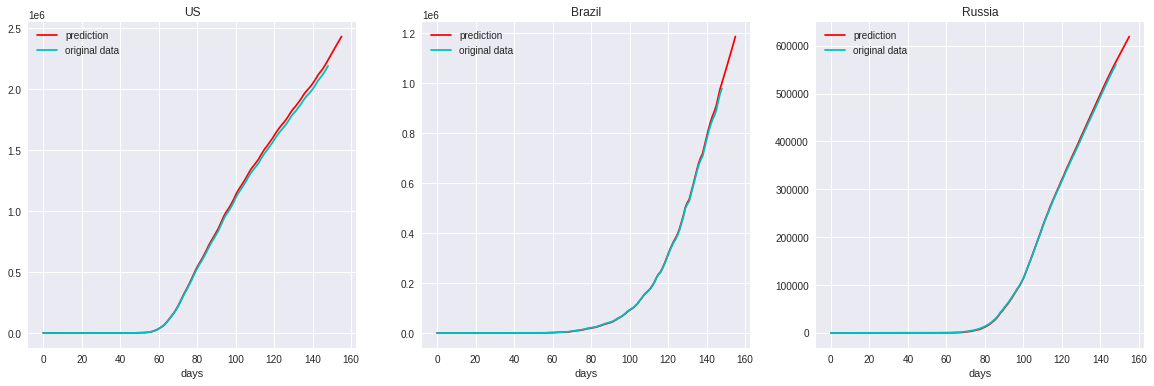

In [17]:
# plot prediction
countries = ['US', 'Brazil', 'Russia']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for i, col in enumerate(ax):
  countryIdx = df.index.get_loc(countries[i])
  col.plot(np.arange(0,149+7), predDf[countryIdx], 'r', label='prediction')
  col.plot(np.arange(0,149), df.iloc[countryIdx,:], 'c', label='original data')
  col.legend()
  col.set_title(countries[i])
  col.set_xlabel('days')
  col.legend()

In [18]:
# from google.colab import files
# uploaded = files.upload()

In [19]:
# import new data up to July 10 containing y_true
newData = pd.read_csv('/content/countries-aggregated_csv.csv')
newData.Date = pd.to_datetime(newData.Date)

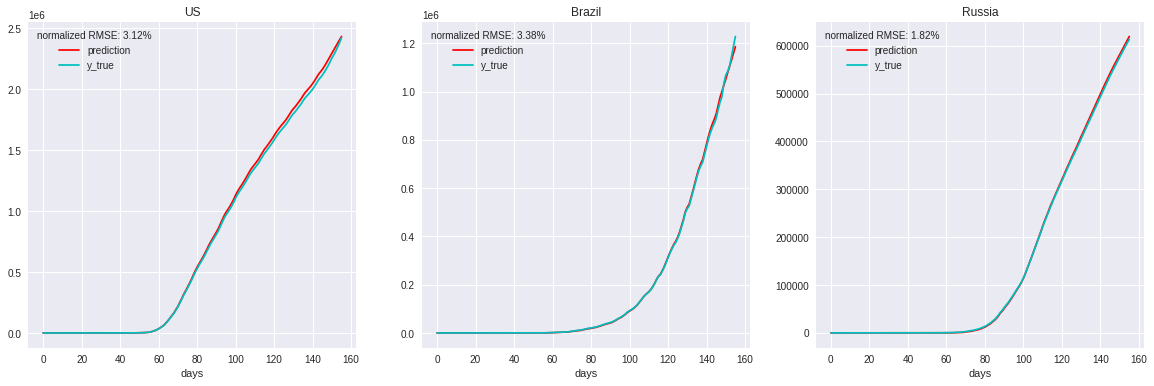

In [25]:
# compare prediction with y_pred and calculate error
from sklearn.metrics import mean_squared_error

countries = ['US', 'Brazil', 'Russia']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for i, col in enumerate(ax):
  countryIdx = df.index.get_loc(countries[i])
  col.plot(np.arange(0,149+7), predDf[countryIdx], 'r', label='prediction')

  y_true = newData[(newData.Country == countries[i]) & (newData.Date <='2020-06-25')]['Confirmed']
  col.plot(np.arange(0,149+7), y_true, 'c', label='y_true')

  rmse = np.sqrt(((predDf[countryIdx] - y_true) ** 2).mean())
  nRMSE = rmse/y_true.mean()

  col.legend(['prediction', 'y_true'], title='normalized RMSE: {:.2f}%'.format(nRMSE*100))
  col.set_title(countries[i])
  col.set_xlabel('days')


* To make prediction, first calcualte the covariance matrix and eighenvectors. 
Since the eighenvectors represents trend that would not fluctuate for the near future, predict it to be linear and use extrapolation to find values for next 7 days. Reconstruct the data using projection, and reverse standardization with extrapolated mean and standard deviation. 

* The predicted trend continues to increase for US, Brazil and Russia. 

* The model works best for countries that still have a strong increasing trend. Their strong trend heavily affect the mean and standard deviation across all countries, therefore they dominates the predicted mean and stardard deviation, then the reverse standardization fits them the best. 




# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


